In [11]:
# Step 1: Import libraries
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
# Step 2: Load data
df = pd.read_csv("../data/iris_engineered.csv")
X = df.drop(columns=["target"])
y = df["target"]

In [13]:
# Step 3: Train-test split (same as in model training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Step 4: Load models
rf_model = joblib.load("../models/random_forest_model.pkl")
lr_model = joblib.load("../models/logistic_regression_model.pkl")
svm_model = joblib.load("../models/svm_model.pkl")

In [17]:
# Step 5: Make predictions
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

In [18]:
# Step 6: Evaluation Metrics
from sklearn.datasets import load_iris
iris = load_iris()  # for target names in confusion matrix
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔹 {name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)

    # Visualize confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


🔹 Random Forest Evaluation
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



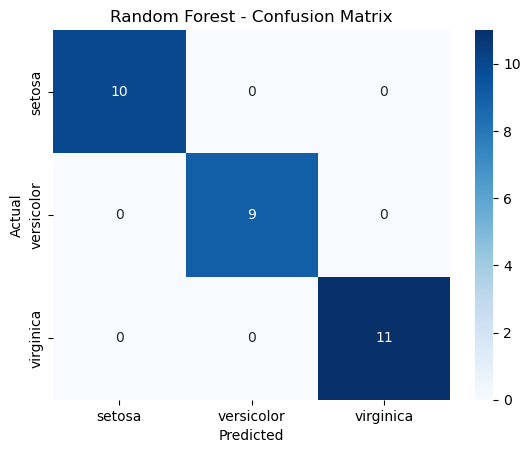


🔹 Logistic Regression Evaluation
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



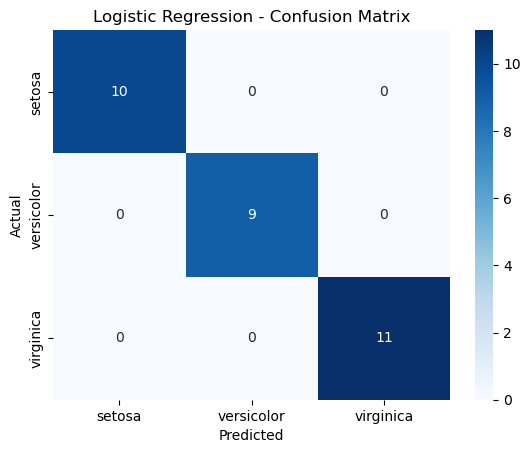


🔹 Support Vector Machine (SVM) Evaluation
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



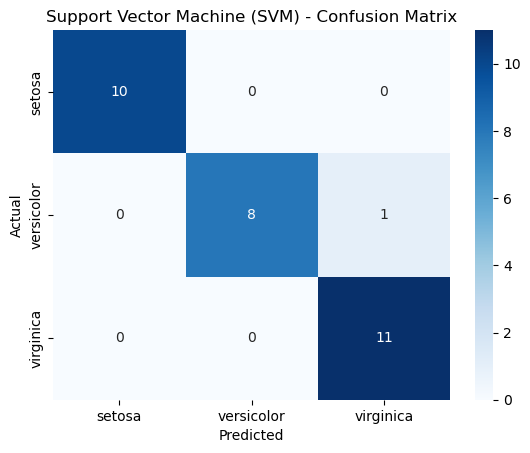

In [19]:
# Step 7: Evaluate both models


evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Support Vector Machine (SVM)", y_test, svm_preds)